# Предсказание продолжения деятельности стартапов

## Описание проекта

<b>Задача:</b>
<br>Построить можель которая будет предсказывать будет ли стартапы продолжать свою деятельность дальше.
<br>
<br>
<b>Дано:</b>
<br>
<br>
<b>Таблица 1 - kaggle_startups_sample_submit_28062024.csv:</b>
<br> - name - название стартапа.
<br> - status - статус стартапа: <b>operating</b> - действует, <b>closed</b> - закрылся.
<br>
<br>
<b>Таблица 2 - kaggle_startups_train_28062024.csv:</b>
<br> - name	- название стартапа.
<br> - category_list - деятельность стартапа.
<br> - funding_total_usd - общий объем финансирования в долларах.
<br> - status - статус стартапа: <b>operating</b> - действует, <b>closed</b> - закрылся.
<br> - country_code	- код страны стартапа: <b>CHE</b> - Швейцария, <b>USA</b> - США и т.д.
<br> - state_code - неизвестно.
<br> - region - регион стартапа.
<br> - city	- город стартапа.
<br> - funding_rounds - количество финансовых раундов.
<br> - founded_at - дата основания стартапа.
<br> - first_funding_at	- первое финансирование стартапа.
<br> - last_funding_at - последнее финансирование стартапа.
<br> - closed_at - дата закрытия стартпа.
<br>
<br>
<b>Таблица 3 - kaggle_startups_test_28062024.csv:</b>
<br> - name	- название стартапа.
<br> - category_list - деятельность стартапа.
<br> - funding_total_usd - общий объем финансирования в долларах. 
<br> - country_code	- код страны стартапа: <b>CHE</b> - Швейцария, <b>USA</b> - США и т.д.
<br> - state_code - неизвестно.
<br> - region - регион стартапа.
<br> - city	- город стартапа.
<br> - funding_rounds - количество финансовых раундов.
<br> - first_funding_at	- первое финансирование стартапа.
<br> - last_funding_at - последнее финансирование стартапа.
<br> - lifetime - срок работы стартапа.
<br>
<br> В таблицах представлена информация о стартапах, которые функционировали в период с 1980 по 2018 годы.
<br>
<br>
<b>План работы</b>
<br>
<br>Загрузка и ознакомление с данными.
<br>Предварительная обработка.
<br>Полноценный разведочный анализ.
<br>Разработка новых синтетических признаков.
<br>Проверка на мультиколлинеарность.
<br>Отбор финального набора обучающих признаков.
<br>Выбор и обучение моделей.
<br>Итоговая оценка качества предсказания лучшей модели.
<br>Анализ важности ее признаков.
<br>Подготовка отчета по исследованию.

## Импорт библиотек

In [84]:
line = ('-' * 120)
#Загрузка и обработка данных. 
import pandas as pd

import numpy as np

from datetime import datetime

import warnings

warnings.filterwarnings("ignore")

#Визуальзация данных 
import matplotlib.pyplot as mp

from matplotlib import pyplot as plt

import seaborn as sns

#Предварительная обработка.
from sklearn.impute import SimpleImputer

#Проверка на мультиколлинеарность
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Работа с признаками.
from sklearn.feature_selection import SelectKBest, mutual_info_classif 

#Работа с пайплайнами и обучение моделей.
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

RANDOM_STATE = 42

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Оценки модели
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

## Загрузка и ознакомление с данными

### Файл kaggle_startups_sample_submit_28062024.csv

In [2]:
def percentage_passes (dataset):
    print('Процент пропущенных значений таблицы:')
    for col in dataset.columns:
        pct_missing = np.mean(dataset[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))   

In [3]:
startups_sample_submit = pd.read_csv('kaggle_startups_sample_submit_28062024.csv', skipinitialspace=True)
startups_sample_submit.head()

,name,status
0,Crystalsol,closed
1,JBI Fish & Wings,operating
2,COINPLUS,closed
3,Imagine Communications,closed
4,DNA13,operating


In [4]:
startups_sample_submit.info()
print(line)
percentage_passes(startups_sample_submit) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    13125 non-null  object
 1   status  13125 non-null  object
dtypes: object(2)
memory usage: 205.2+ KB
------------------------------------------------------------------------------------------------------------------------
Процент пропущенных значений таблицы:
name - 0%
status - 0%


Таблица - <b>startups_sample_submit</b> имеет 13125 строк и 2 столбца. Пропусков нет.

### Файл kaggle_startups_train_28062024.csv

In [5]:
startups_train = pd.read_csv('kaggle_startups_train_28062024.csv', skipinitialspace=True)
startups_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


In [6]:
startups_train.info()
print(line)
percentage_passes(startups_train) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB
------------------------------------------------------------------------------------------------------------

Таблица - <b>startups_train</b> имеет 52516 строк и 13 столбцов. Есть пропуски.

### Файл kaggle_startups_test_28062024.csv

In [7]:
startups_test = pd.read_csv('kaggle_startups_test_28062024.csv', skipinitialspace=True)
startups_test.head()

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


In [8]:
startups_test.info()
print(line)
percentage_passes(startups_test) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB
------------------------------------------------------------------------------------------------------------------------
Процент пропущенных значений таблицы:
name - 0%
category_list - 5%
funding_total_usd

Таблица - <b>startups_test</b> имеет 13125 строк и 11 столбцов. Есть пропуски.

### Вывод

<br>Создано 3 таблицы:
<br>1. 'startups_sample_submit' из 'kaggle_startups_sample_submit_28062024.csv' - имеет 13125 строк и 2 столбца. Пропусков нет.
<br>2. 'startups_train' из 'kaggle_startups_train_28062024.csv' - имеет 52516 строк и 13 столбцов. Есть пропуски.
<br>3. 'startups_test' из 'kaggle_startups_test_28062024.csv' - имеет 13125 строк и 11 столбцов. Есть пропуски.

## Предварительная обработка

### Предварительная обработка startups_sample_submit

Перым делом проверю самое простое, нет ли дубликатов в таблице - <b>startups_sample_submit</b> а так-же нет ли ошибок в обозначении закрылся стартап или нет.

In [9]:
print(f'Количество дубликатов во всей таблице - {startups_sample_submit.duplicated().sum()}')
print(line)
print(f'Количество дубликатов в столбце name - {startups_sample_submit['name'].duplicated().sum()}')
print(line)
print(f'Уникальные значения столбца status - {startups_sample_submit['status'].unique()}')

Количество дубликатов во всей таблице - 0
------------------------------------------------------------------------------------------------------------------------
Количество дубликатов в столбце name - 0
------------------------------------------------------------------------------------------------------------------------
Уникальные значения столбца status - ['closed' 'operating']


<b>Итог</b>
<br>В таблице <b>startups_sample_submit</b> нет никаких проблем.

### Предварительная обработка startups_train

Теперь проверю таблицу <b>startups_train</b>. Уже по первичному изучению информации видно что с ней дела куда хуже.

Для начала приведу столбцы в порядок визуально.

In [10]:
startups_train['name'] = startups_train['name'].str.lower()
startups_train['category_list'] = startups_train['category_list'].str.lower()
startups_train['country_code'] = startups_train['country_code'].str.lower()
startups_train['state_code'] = startups_train['state_code'].str.lower()
startups_train['region'] = startups_train['region'].str.lower()
startups_train['city'] = startups_train['city'].str.lower()

А так-же преобразую дату.

In [11]:
startups_train['founded_at'] = pd.to_datetime(startups_train['founded_at'],  format='%Y-%m-%d')
startups_train['first_funding_at'] = pd.to_datetime(startups_train['first_funding_at'],  format='%Y-%m-%d')
startups_train['last_funding_at'] = pd.to_datetime(startups_train['last_funding_at'],  format='%Y-%m-%d')
startups_train['closed_at'] = pd.to_datetime(startups_train['closed_at'],  format='%Y-%m-%d')

Теперь посмотрю явные дубликаты.

In [12]:
print(f'Количество дубликатов во всей таблице - {startups_train.duplicated().sum()}')
print(line)
print(f'Количество дубликатов в столбце name - {startups_train['name'].duplicated().sum()}')

Количество дубликатов во всей таблице - 0
------------------------------------------------------------------------------------------------------------------------
Количество дубликатов в столбце name - 43



Понятно что в столбце name по сути не должно быть дубликатов, но - для предсказания этот столбец не нужен так-что я оставлю эти дубликаты ибо они есть только в названиях так-как 100% схожести во всей таблице нет. Другие категориальные столбцы смотреть не стал так-как дубликаты в них будут и это нормально.

In [13]:
print(f'Уникальные значения столбца status - {startups_train['status'].unique()}')
print(line)
print(f'Уникальные значения столбца country_code - {startups_train['country_code'].unique()}')

Уникальные значения столбца status - ['operating' 'closed']
------------------------------------------------------------------------------------------------------------------------
Уникальные значения столбца country_code - ['che' 'usa' nan 'gbr' 'rus' 'esp' 'fra' 'swe' 'ind' 'kor' 'aus' 'twn'
 'chn' 'hun' 'can' 'fin' 'bra' 'egy' 'prt' 'isr' 'chl' 'svk' 'nld' 'arg'
 'are' 'jpn' 'irl' 'deu' 'lbn' 'est' 'idn' 'bel' 'mex' 'dnk' 'ita' 'grc'
 'rom' 'tur' 'sgp' 'sau' 'mys' 'nga' 'qat' 'vnm' 'bgr' 'gha' 'uga' 'jor'
 'aut' 'pak' 'nzl' 'hkg' 'zaf' 'lva' 'nor' 'hrv' 'ven' 'per' 'lux' 'svn'
 'pol' 'phl' 'nic' 'cze' 'isl' 'pan' 'ury' 'bgd' 'mco' 'gtm' 'tha' 'tto'
 'ukr' 'ken' 'cri' 'dza' 'ltu' 'cym' 'mus' 'blr' 'slv' 'col' 'mlt' 'pse'
 'blz' 'cyp' 'mmr' 'mkd' 'khm' 'gib' 'srb' 'dom' 'bwa' 'blm' 'pry' 'bmu'
 'tan' 'lie' 'grd' 'uzb' 'geo' 'sen' 'alb' 'ecu' 'moz' 'lka' 'lao' 'tun'
 'hnd' 'zwe' 'bah' 'mda' 'maf' 'bhr' 'aze' 'mar' 'kwt' 'irn' 'ggy' 'kna'
 'pri' 'omn' 'kaz' 'jam' 'npl' 'arm' 'tgo' 'rwa'


Неявных дубликатов не выявленно. Можно конечно посмотреть ещё и другие столбцы к примеру столбцы с городом или регионом но там сильно много записей. Решил обработать их только в случае с низкими показателями модели.


Несмотря на то что функция которая показывает процент пропущенных значений показала что в строке 'name' нет пропуска, один пропуск всё-же есть.

In [14]:
startups_train[startups_train['name'].isna()]

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
3291,NaN,startups,25000.0,closed,usa,or,"portland, oregon",portland,1,2011-10-01,2012-03-01,2012-03-01,2013-06-03


В этой строке пропуск только в названии. По сути название стартапа для обучения данной модели не нужно то строку нужно оставить.

Что на счет пропусков в других столбцах. Их я оставлю как есть и заполню на момент создания пайплайнов. Можно создать пайплайн сейчас, но при разработке новых синтетических признаков эти пайплайны придеться переписывать уже для новых признаков так-что обработаю пропуски потом.

Создам столбец <b>lifetime</b>. заполню пропуски в столбце <b>closed_at</b> датой - '2018-01-01' ибо это дата формирования датасетов.

In [15]:
startups_train['closed_at'] = startups_train['closed_at'].fillna('2018-01-01') #Заполню пропуски 
startups_train['lifetime'] = (startups_train['closed_at'] - startups_train['founded_at']).dt.days #Посчитаю количество дней.
startups_train.head(5)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime
0,lunchgate,online reservations|restaurants,828626.0,operating,che,25,zurich,zürich,2,2009-10-17,2011-05-01,2014-12-01,2018-01-01,2998
1,earlens,manufacturing|medical|medical devices,42935019.0,operating,usa,ca,sf bay area,redwood city,4,2005-01-01,2010-05-04,2014-02-25,2018-01-01,4748
2,reviva pharmaceuticals,biotechnology,35456381.0,operating,usa,ca,sf bay area,san jose,3,2006-01-01,2012-08-20,2014-07-02,2018-01-01,4383
3,sancilio and company,health care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,2018-01-01,5114
4,wiretough cylinders,manufacturing,NaN,operating,usa,va,va - other,bristol,1,2010-05-12,2012-02-01,2012-02-01,2018-01-01,2791


<b>Итог</b>
<br>Символы преведены в нижний регистр.
<br>Дубликатов не обнаруженно.
<br>Создан столбец - <b>lifetime</b> - срок работы стартапа на момент записи датасета.

### Предварительная обработка  startups_test

На первый взгляд видно что таблица очень похожа на таблицу <b>startups_train</b>.

Приведу текст в нижний регистр.

In [16]:
startups_test['name'] = startups_test['name'].str.lower()
startups_test['category_list'] = startups_test['category_list'].str.lower()
startups_test['country_code'] = startups_test['country_code'].str.lower()
startups_test['state_code'] = startups_test['state_code'].str.lower()
startups_test['region'] = startups_test['region'].str.lower()
startups_test['city'] = startups_test['city'].str.lower()

Обработаю дату.

In [17]:
startups_test['first_funding_at'] = pd.to_datetime(startups_test['first_funding_at'],  format='%Y-%m-%d')
startups_test['last_funding_at'] = pd.to_datetime(startups_test['last_funding_at'],  format='%Y-%m-%d')

Проверю дубликаты.

In [18]:
print(f'Количество дубликатов во всей таблице - {startups_test.duplicated().sum()}')
print(line)
print(f'Количество дубликатов в столбце name - {startups_test['name'].duplicated().sum()}')

Количество дубликатов во всей таблице - 0
------------------------------------------------------------------------------------------------------------------------
Количество дубликатов в столбце name - 2


С дубликатами всё в порядке. Теперь проверю неявные дубликаты. Проверять будут только один столбец так-как ситуация тут такая-же как и в прошлой таблице.

In [19]:
print(f'Уникальные значения столбца country_code - {startups_test['country_code'].unique()}')

Уникальные значения столбца country_code - ['nic' 'usa' 'lux' 'can' nan 'mys' 'deu' 'gbr' 'fra' 'ita' 'chn' 'arg'
 'nld' 'irl' 'aus' 'che' 'chl' 'esp' 'ind' 'isr' 'dnk' 'kor' 'rus' 'phl'
 'ury' 'sgp' 'bra' 'egy' 'mex' 'pol' 'vnm' 'aut' 'est' 'bel' 'dma' 'prt'
 'swe' 'jor' 'hun' 'hkg' 'jpn' 'zaf' 'col' 'bgr' 'cze' 'grc' 'ltu' 'twn'
 'isl' 'idn' 'fin' 'nor' 'are' 'ukr' 'ken' 'nga' 'tur' 'cri' 'tha' 'cyp'
 'rom' 'mmr' 'ven' 'bhr' 'nzl' 'svk' 'cym' 'lva' 'mkd' 'per' 'aze' 'bwa'
 'bgd' 'zwe' 'civ' 'lka' 'svn' 'srb' 'blr' 'tan' 'sau' 'gha' 'cmr' 'tto'
 'pak' 'bmu' 'pse' 'uga' 'mus' 'jam' 'lbn' 'ecu' 'pan' 'gtm' 'hrv' 'brb'
 'zmb']


Дубликатов нет.

Не похо бы было добавить в таблицу столбец с датой основания стартапа как в таблице startups_train. Но для этого надо знать дату закрытия некоторых стартапов. Можно конечно подставить дату '2018-01-01' но эта дата не подойдет для закрытых стартапов.

Посмотрю сколько же стартапов из этой таблицы закрылось.

In [20]:
def direct_diagram(variable, column):
    display(variable[column].unique())

    plt.figure(figsize=(8,6))
    plot = sns.countplot(y=column, data=variable)
    plot.set_title(f'Рапределение по - {column}', fontsize=15)
    plot.set_xlabel('Количество', fontsize=10)
    plt.show()

array(['closed', 'operating'], dtype=object)

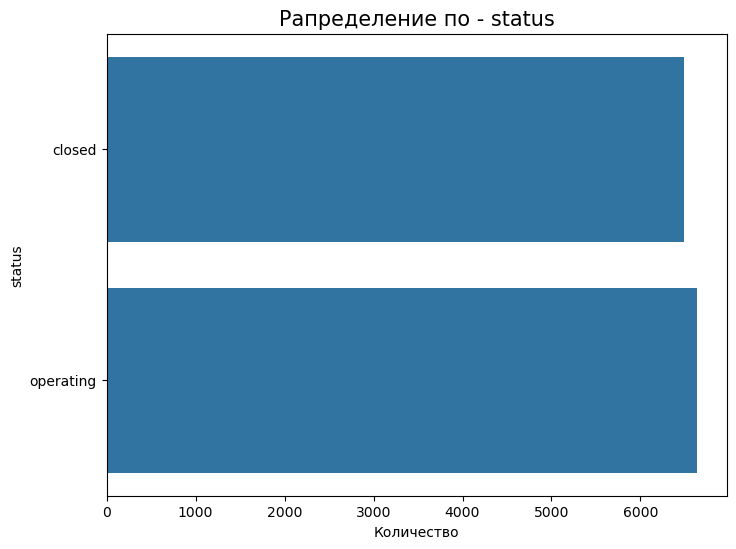

In [21]:
direct_diagram(startups_sample_submit, 'status')

Половина таблицы состоит из закрытых стартапов. И считать дату открытия от даты записи датафрейма только навредит.

<b>Итог</b>
<br>Символы преведены в нижний регистр.
<br>Дубликатов не обнаруженно.

### Итог переработки таблиц

<br>Таблица <b>startups_sample_submit</b>:
<br>С ней всё в порядке. В переработке не нуждалась.
<br>
<br>Таблица <b>startups_train</b>:
<br>Символы преведены в нижний регистр.
<br>Дубликатов не обнаруженно.
<br>Создан столбец - <b>lifetime</b> - срок работы стартапа на момент записи датасета.
<br>
<br>Таблица <b>startups_test</b>:
<br>Символы преведены в нижний регистр.
<br>Дубликатов не обнаруженно.

## Полноценный разведочный анализ

### Функции

In [22]:
def radial_diagram (variable, column):
    variable[column].value_counts().plot(y='subscription_type', kind='pie',figsize=(8,8), autopct='%1.1f%%')
    mp.title(f'Диаграмма для - {column}')
    mp.ylabel("")
    mp.show()

def data_analysis (variable, column):
    means = variable[column].mean()
    medians = variable[column].median()
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].axvline(x=means, color='green')
    axes[0].axvline(x=medians, color='red')
    axes[0].legend(['Среднее значение - {:.2f}'.format(means),
                    'Медианное значение - {:.2f}'.format(medians)])
    axes[0].set_title(f'Гистограмма для - {column}', fontsize=15)
    axes[0].set_ylabel('Количество', fontsize=10)
    
    sns.histplot(variable, bins=20, kde=True, ax=axes[0], x=column)
    axes[1].set_title(f'График ящик с усами для - {column}', fontsize=15)
    sns.boxplot(data=variable, ax=axes[1], y=column)
    axes[1].set_ylabel(column, fontsize=10)
    plt.show()

def direct_diagram(variable, column):
    display(variable[column].unique())
    plt.figure(figsize=(8,6))
    plot = sns.countplot(y=column, data=variable)
    plot.set_title(f'Рапределение по - {column}', fontsize=15)
    plot.set_xlabel('Количество', fontsize=10)
    plt.show()

### Полноценный разведочный анализ startups_train

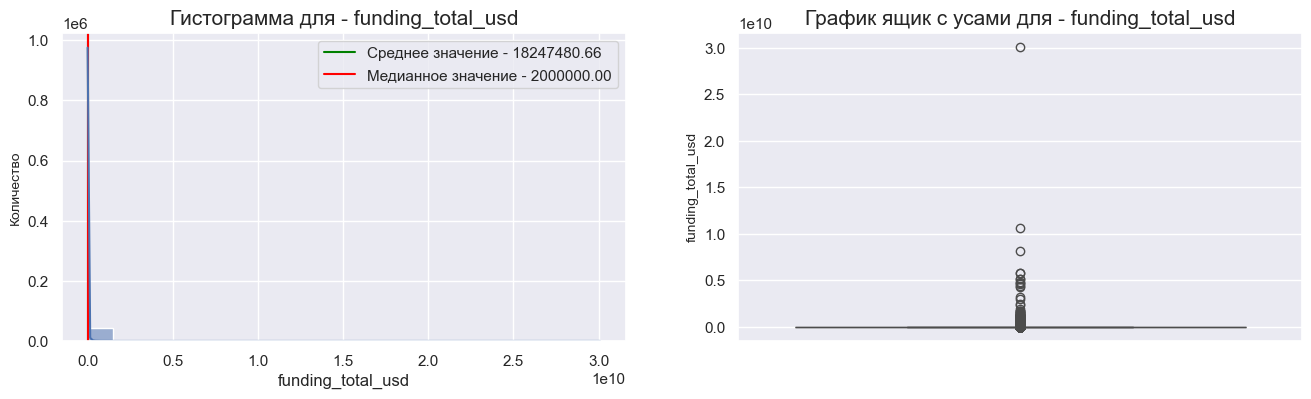

In [23]:
data_analysis(startups_train, 'funding_total_usd')

Одно значение слишком выбивается. Для анализа я его уберу.

In [24]:
startups_train['funding_total_usd'].max()

30079503000.0

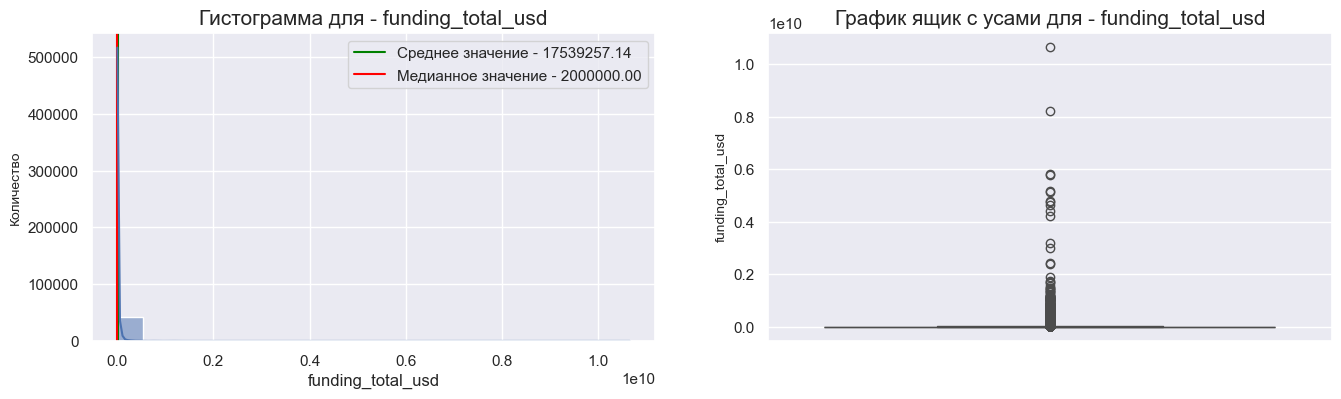

In [25]:
startups_train_analis = startups_train[startups_train['funding_total_usd'] < 30079503000.0]
data_analysis(startups_train_analis, 'funding_total_usd')

Ве еще график сложно оценить. Принял решение сделать визуализацию грефика сделав крайнюю точку медианой данного графика.

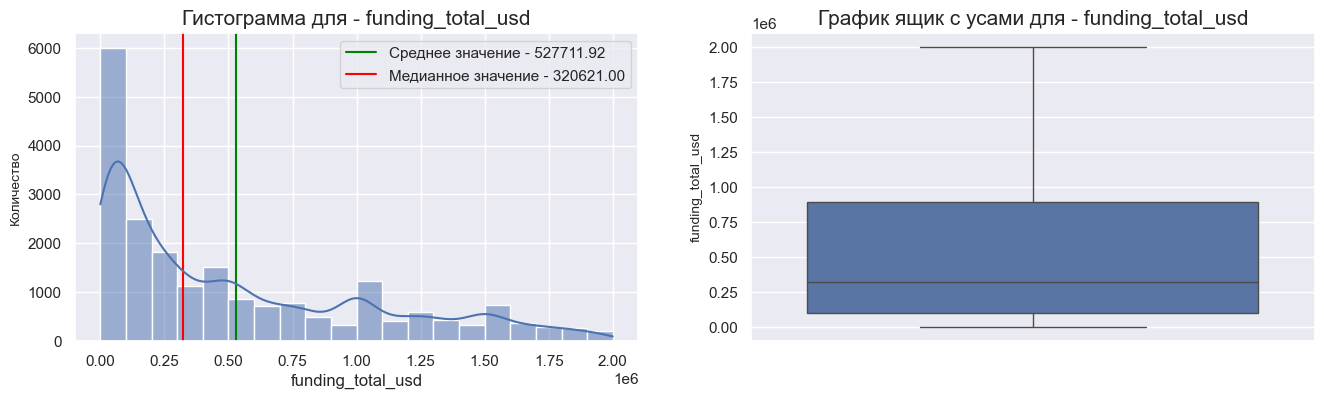

In [26]:
startups_train_analis = startups_train_analis[startups_train_analis['funding_total_usd'] < 2000000]
startups_train_analis = startups_train_analis[startups_train_analis['funding_total_usd'] > 0]
data_analysis(startups_train_analis, 'funding_total_usd')


Общий объем финансирования у большенства стартапов не привысил 250 тысяч долларов.

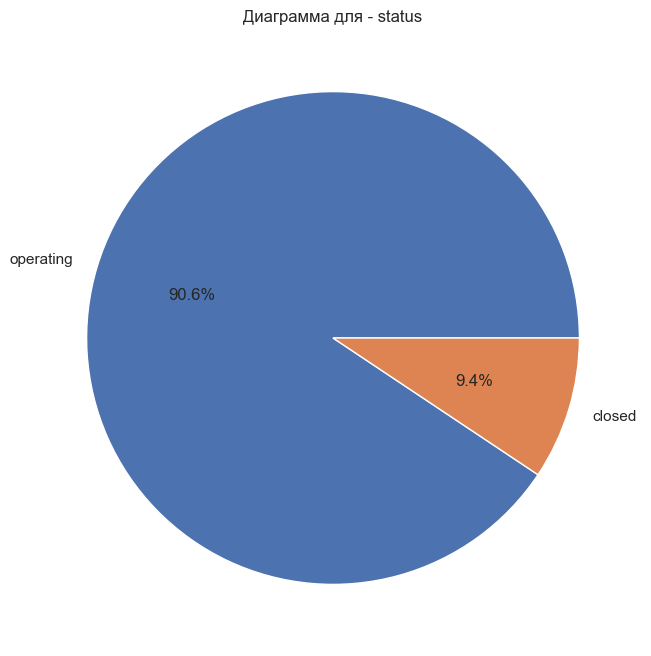

In [27]:
radial_diagram(startups_train, 'status')

Всего 8.6% стартапов закрылось.

In [28]:
print(startups_train['country_code'].value_counts().to_frame().head())
print(line)
print(startups_train['country_code'].value_counts(normalize=True).to_frame().head())

              count
country_code       
usa           29702
gbr            2925
can            1540
ind            1276
chn            1240
------------------------------------------------------------------------------------------------------------------------
              proportion
country_code            
usa             0.631769
gbr             0.062216
can             0.032756
ind             0.027141
chn             0.026375


Больше всего в таблице стартапов из сша их 64% от всех.

In [29]:
print(startups_train['region'].value_counts().to_frame().head())
print(line)
print(startups_train['region'].value_counts(normalize=True).to_frame().head())

               count
region              
sf bay area     6970
new york city   2776
boston          1890
london          1840
los angeles     1513
------------------------------------------------------------------------------------------------------------------------
               proportion
region                   
sf bay area      0.151006
new york city    0.060143
boston           0.040947
london           0.039864
los angeles      0.032779


Больше всего в таблице стартапов из региона sf bay area их 16% от всех.

In [30]:
print(startups_train['city'].value_counts().to_frame().head())
print(line)
print(startups_train['city'].value_counts(normalize=True).to_frame().head())

               count
city                
san francisco   2824
new york        2486
london          1514
austin           609
palo alto        607
------------------------------------------------------------------------------------------------------------------------
               proportion
city                     
san francisco    0.061182
new york         0.053860
london           0.032801
austin           0.013194
palo alto        0.013151


Больше всего в таблице стартапов из города san francisco и new york их 6% и 5% от всех.

array([ 2,  4,  3,  1,  5,  7,  9,  6,  8, 10, 11, 12, 15, 13, 16, 17, 14,
       18, 19], dtype=int64)

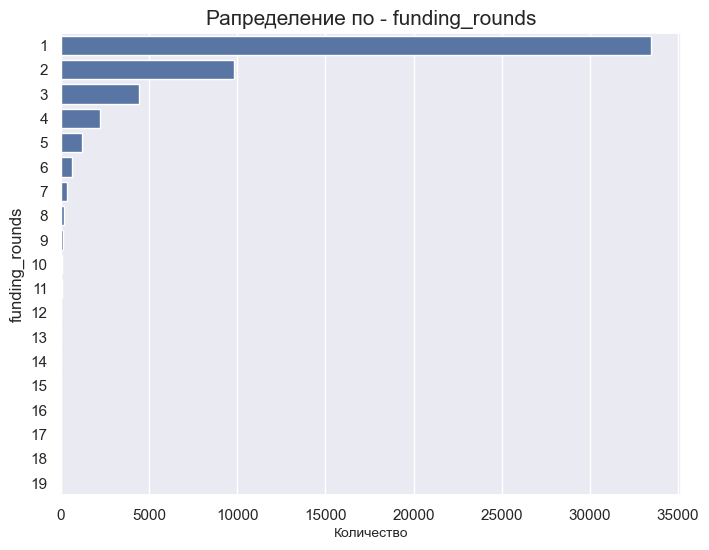

In [31]:
direct_diagram(startups_train, 'funding_rounds')

Почти всегда был только один раунд финансирования.

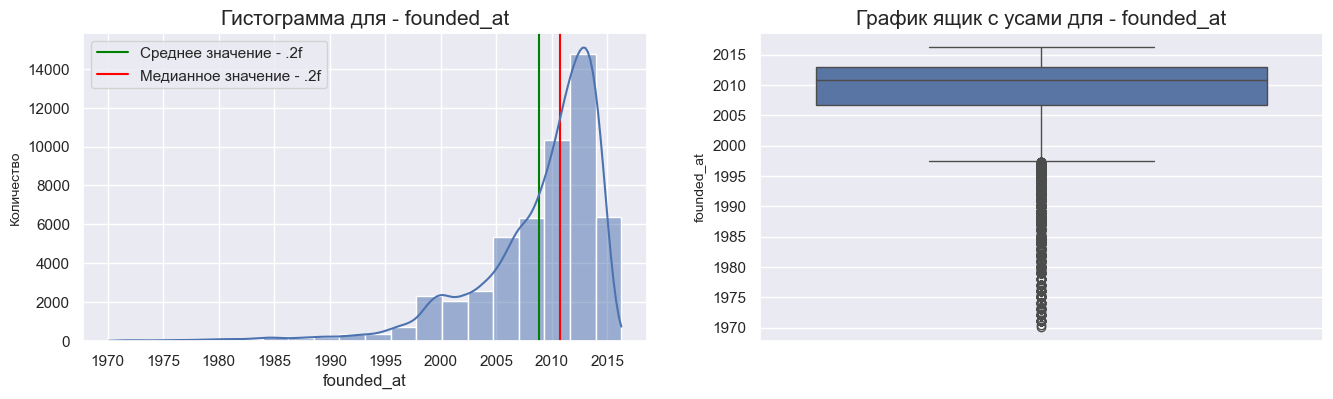

In [32]:
data_analysis(startups_train, 'founded_at')

С 2007 по 2012 год был значительный рост в количестве открыты стартапов. Бльше всего пришлось на промежуток с 2010 - 2012 года.

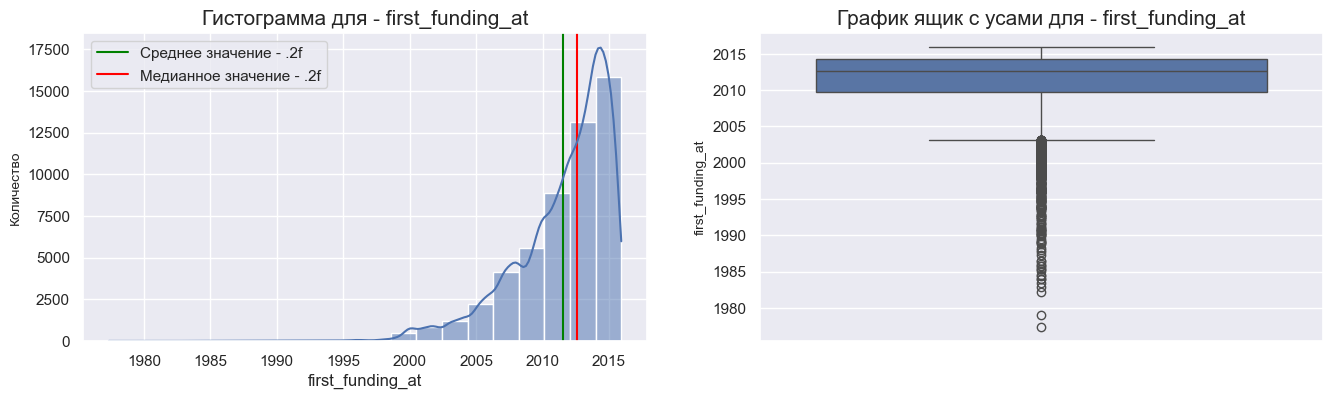

In [33]:
data_analysis(startups_train, 'first_funding_at')

Из года в год число инвистиций увеличивалось. Не смотря на то что в 2015 году открылась меньше стартапов чем в прошлых, количество первых раундов только выросло.

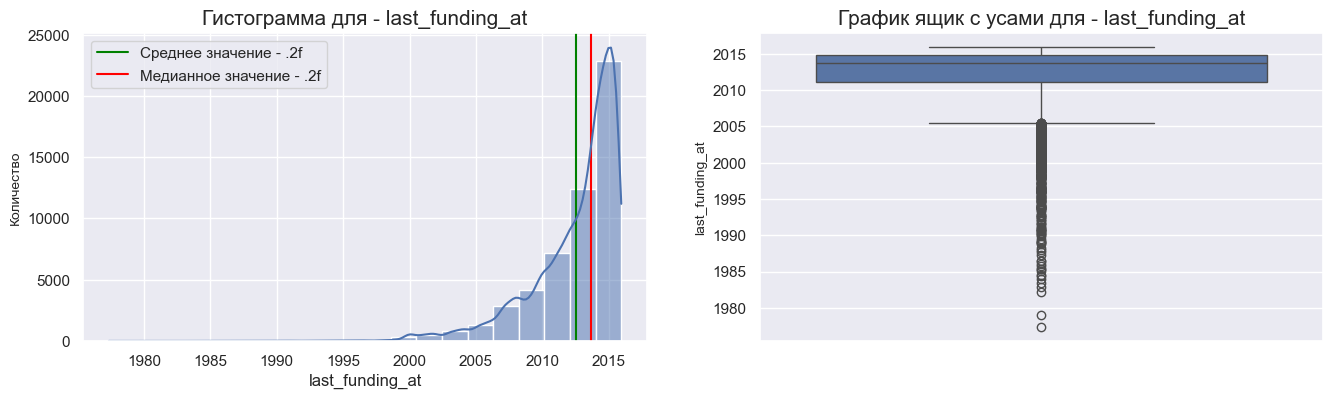

In [34]:
data_analysis(startups_train, 'last_funding_at')

Последнее финансирование тоже происходило в то-же время что и первые инвестиции. Похоже именно из-за этого чаще всего число раундов держиться на 1

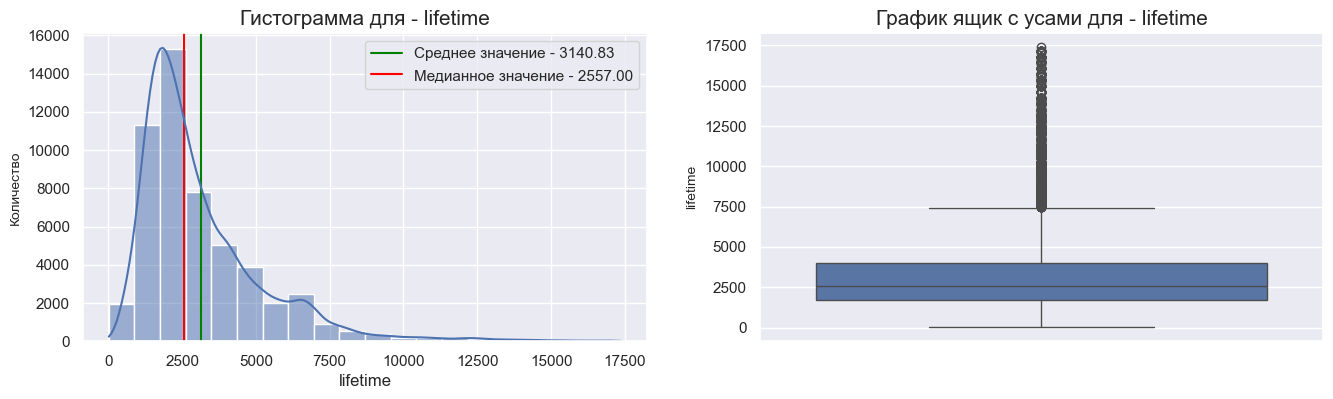

In [35]:
data_analysis(startups_train, 'lifetime')

На момент записи датафрейма большенство стартапов просуществовало 2500 дней. Есть и большие числа по типу 17500 дней, но если учесть что есть компании которые были открыты ещё в 1970г. то это нормально.

### Анализ закрытых стартапов

Создам отдельную переменную.

In [36]:
closed_startups_train = startups_train[startups_train['status'] == 'closed']

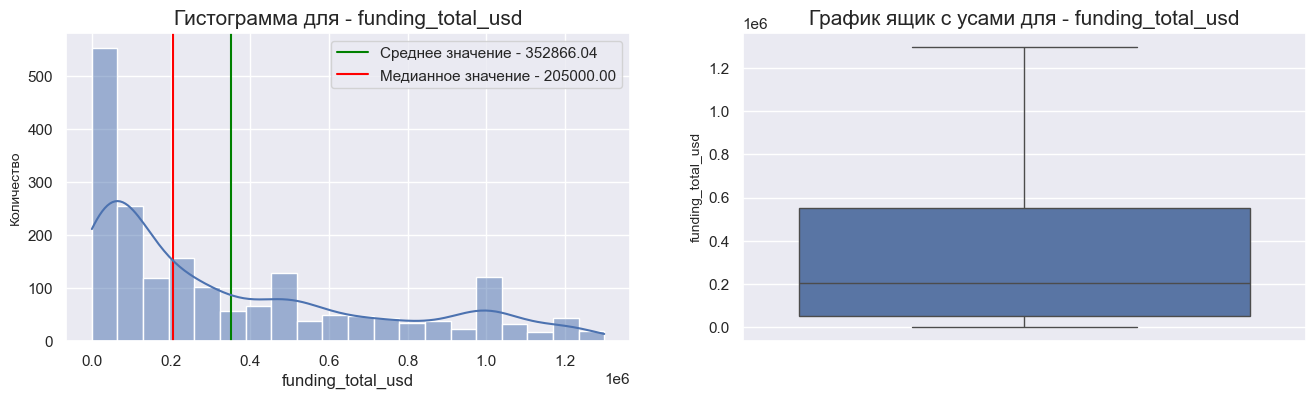

In [37]:
startups_train_analis_2 = closed_startups_train[closed_startups_train['funding_total_usd'] < 1300000]
data_analysis(startups_train_analis_2, 'funding_total_usd')

Основная сумма финансирования расспределена почти равномерно.

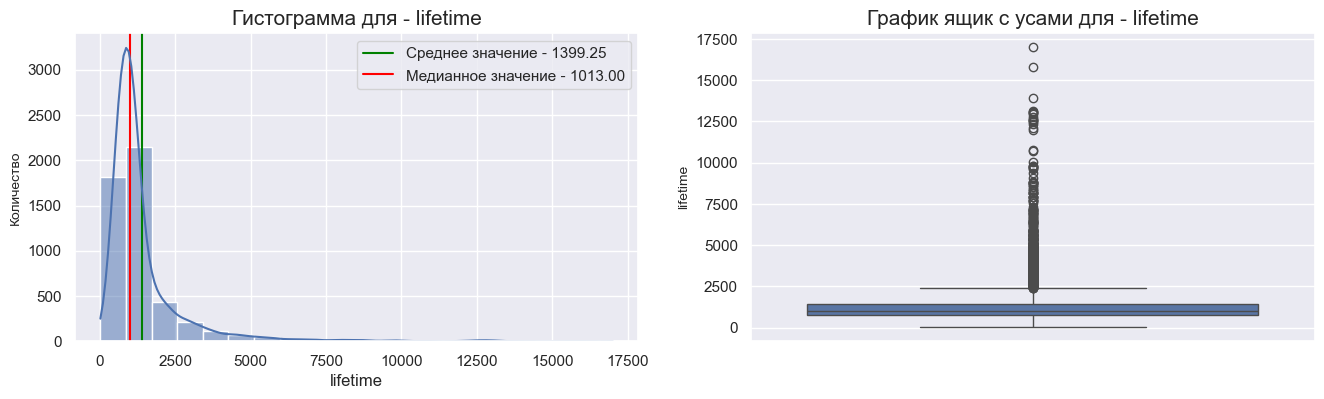

In [38]:
data_analysis(closed_startups_train, 'lifetime')

Зарктые компании в крайне редко доживают хотябы до 2500 дней.

array([ 1,  2,  4,  3,  6,  5, 11,  7, 10,  8,  9], dtype=int64)

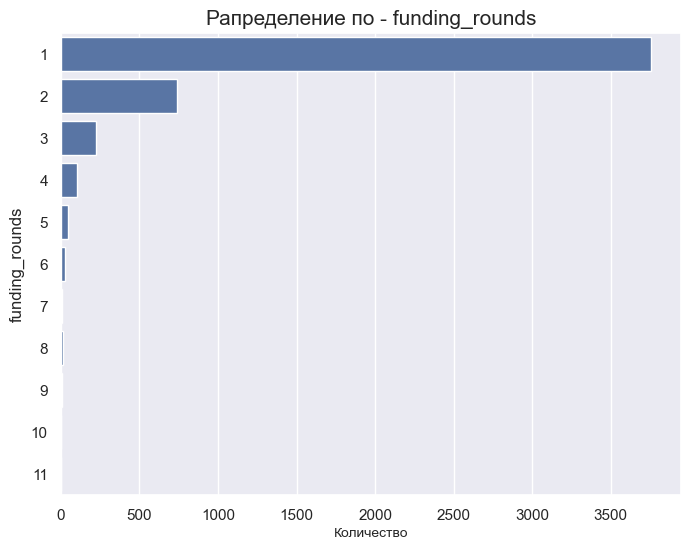

In [39]:
direct_diagram(closed_startups_train, 'funding_rounds')

Крайне редко когда количество раундов финансирования переваливает за 1.

In [40]:
print(closed_startups_train['country_code'].value_counts().to_frame().head())
print(line)
print(closed_startups_train['country_code'].value_counts(normalize=True).to_frame().head())

              count
country_code       
usa            2284
gbr             234
rus             130
can             128
fra              71
------------------------------------------------------------------------------------------------------------------------
              proportion
country_code            
usa             0.629028
gbr             0.064445
rus             0.035803
can             0.035252
fra             0.019554


Как и в анализе всей таблицы США находиться в лидерах по количеству закрытых стартапов.

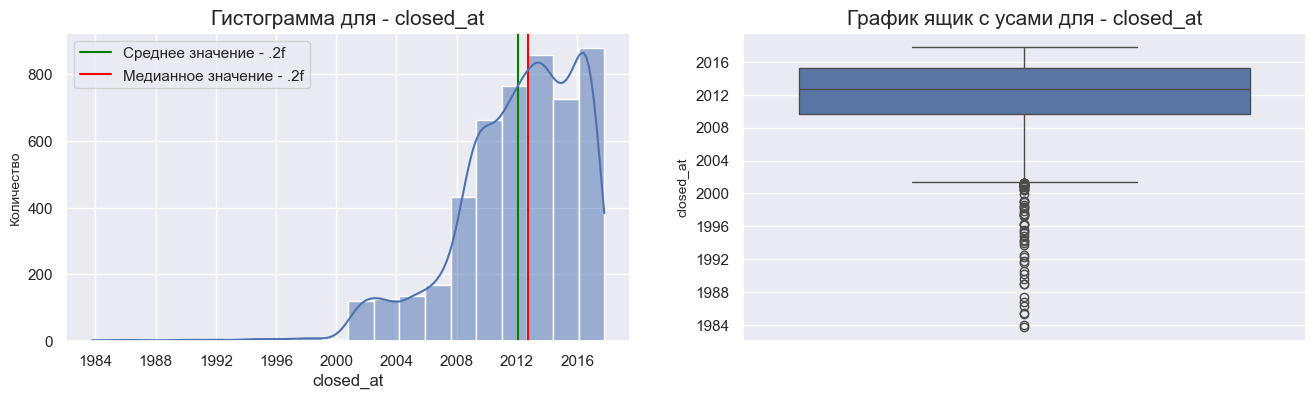

In [41]:
data_analysis(closed_startups_train, 'closed_at')

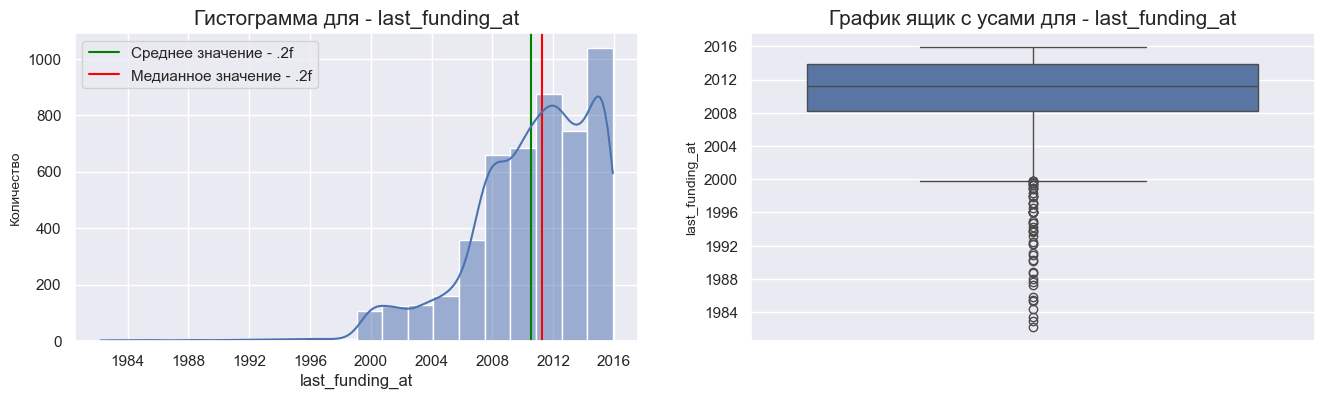

In [42]:
data_analysis(closed_startups_train, 'last_funding_at')

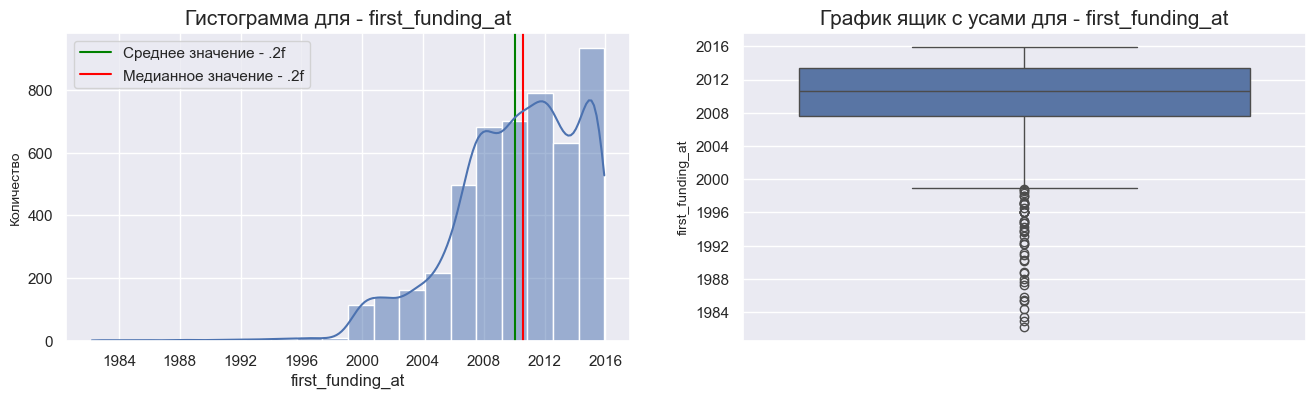

In [43]:
data_analysis(closed_startups_train, 'first_funding_at')

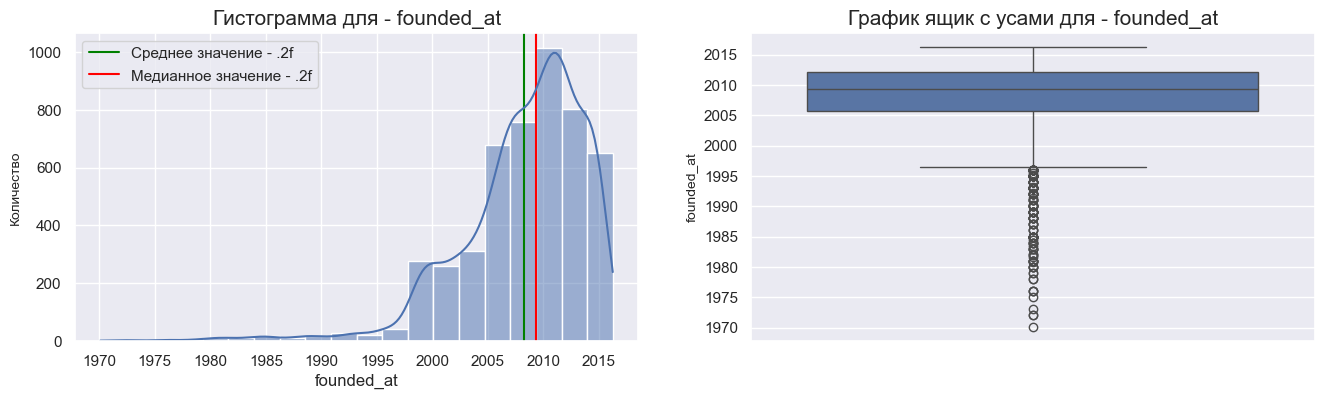

In [44]:
data_analysis(closed_startups_train, 'founded_at')

Расспределение по годам в 4 признаках (Дата открытия стартапа, дата закрытия стартапа и первый и последний раунд финансирования) очень между собой похожи.

### Анализ работающих стартапов

Создам отдельный датасет с работающими стартапами.

In [45]:
operating_startups_train = startups_train[startups_train['status'] == 'operating']

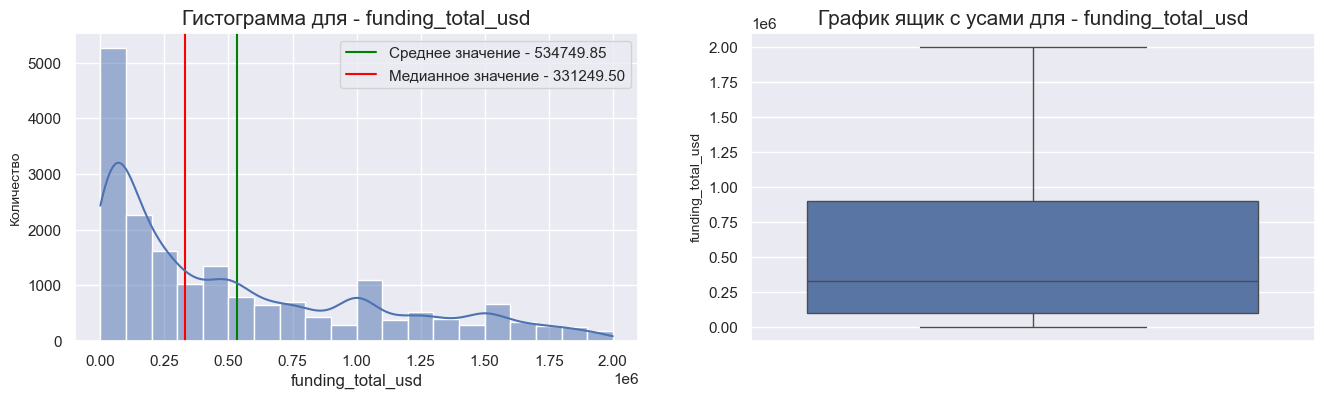

In [46]:
startups_train_analis_3 = operating_startups_train[operating_startups_train['funding_total_usd'] < 2000000]
data_analysis(startups_train_analis_3, 'funding_total_usd')

У работающих стартапов ситуация лучше. Еть даже большое количество стартапов где сумма финансирования привышет 1 млн. долларов.

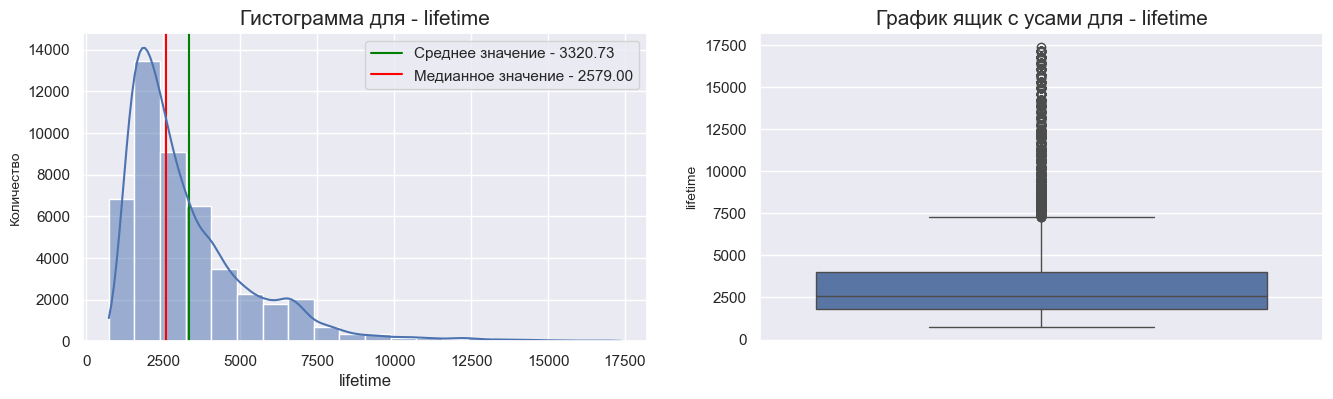

In [47]:
data_analysis(operating_startups_train, 'lifetime')

2500 дней теперь не предел а среднее количество.

array([ 2,  4,  3,  1,  5,  7,  9,  6,  8, 10, 11, 12, 15, 13, 16, 17, 14,
       18, 19], dtype=int64)

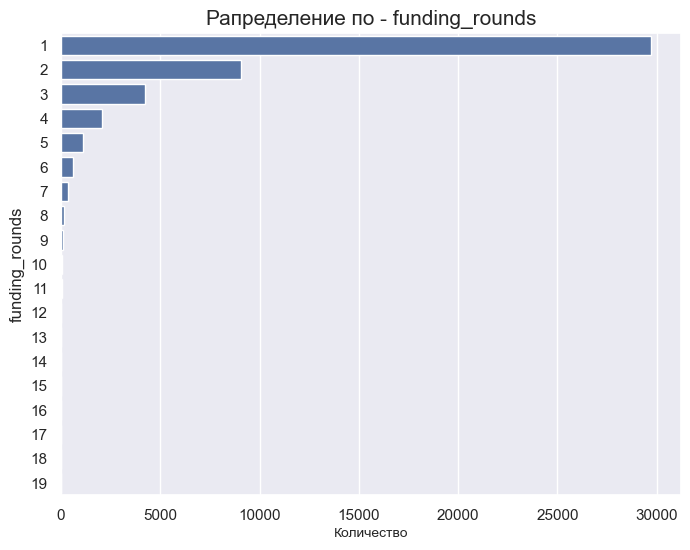

In [48]:
direct_diagram(operating_startups_train, 'funding_rounds')

1 раунд всё ещё находиться в топе но выросло количество в количестве других раундов а так-же появились значения больше 11.

In [49]:
print(operating_startups_train['country_code'].value_counts().to_frame().head())
print(line)
print(operating_startups_train['country_code'].value_counts(normalize=True).to_frame().head())

              count
country_code       
usa           27418
gbr            2691
can            1412
ind            1223
chn            1186
------------------------------------------------------------------------------------------------------------------------
              proportion
country_code            
usa             0.631999
gbr             0.062029
can             0.032547
ind             0.028191
chn             0.027338


США всё еще в лидерах. Так-же спиок мало чем отличается от списка с полной таблицы.

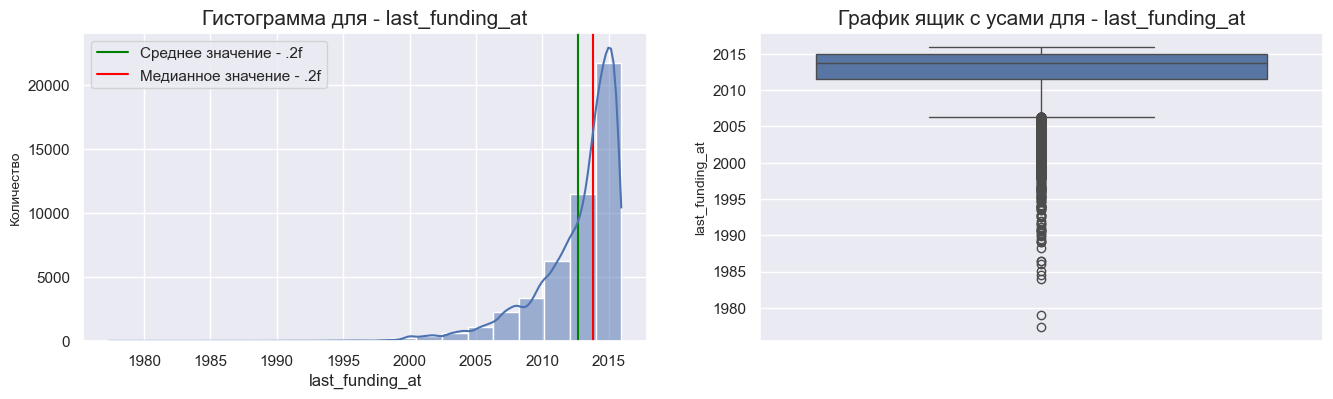

In [50]:
data_analysis(operating_startups_train, 'last_funding_at')

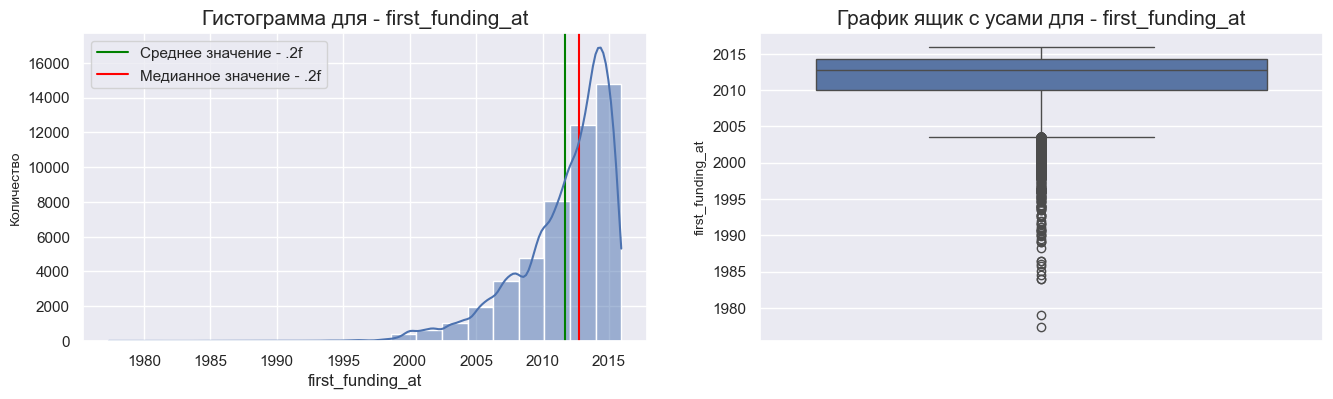

In [51]:
data_analysis(operating_startups_train, 'first_funding_at')

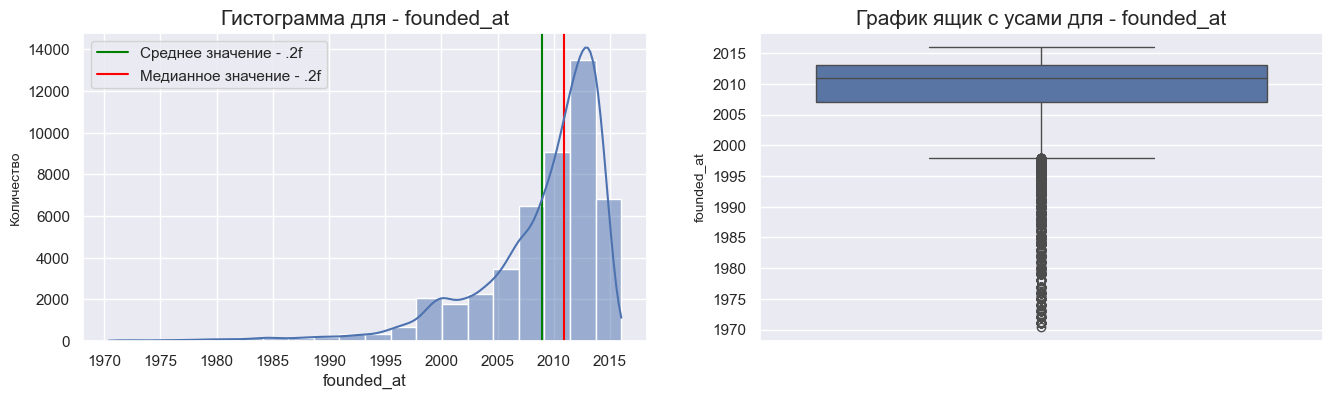

In [52]:
data_analysis(operating_startups_train, 'founded_at')

Как и в прошлый раз первый, последний райнд финансирования а так-же дата открытия стартапов очень между собой похожи.

### Полноценный разведочный анализ startups_test и startups_sample_submit

Ради интереса посмотрю на таблицу startups_test.

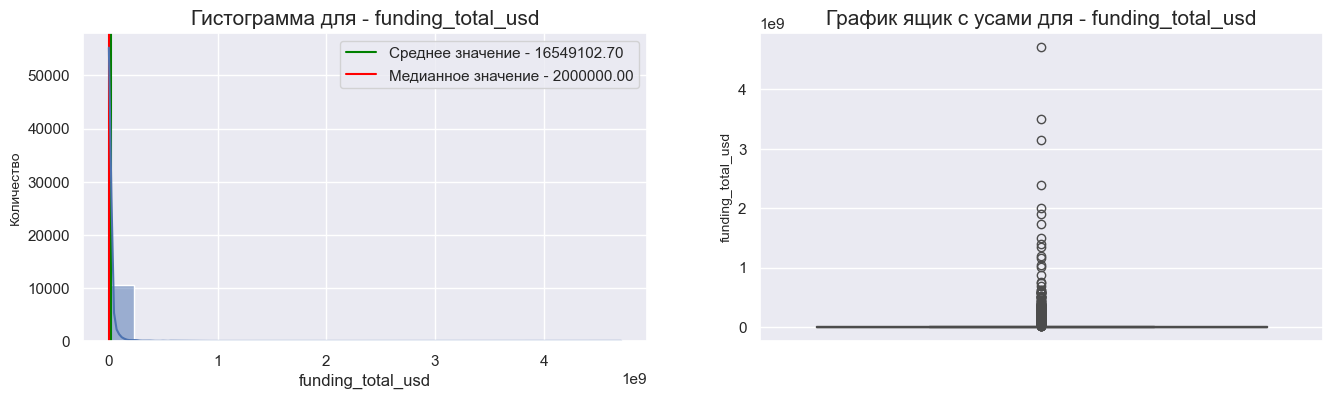

In [53]:
data_analysis(startups_test, 'funding_total_usd')

Тут так-же есть большие данные.

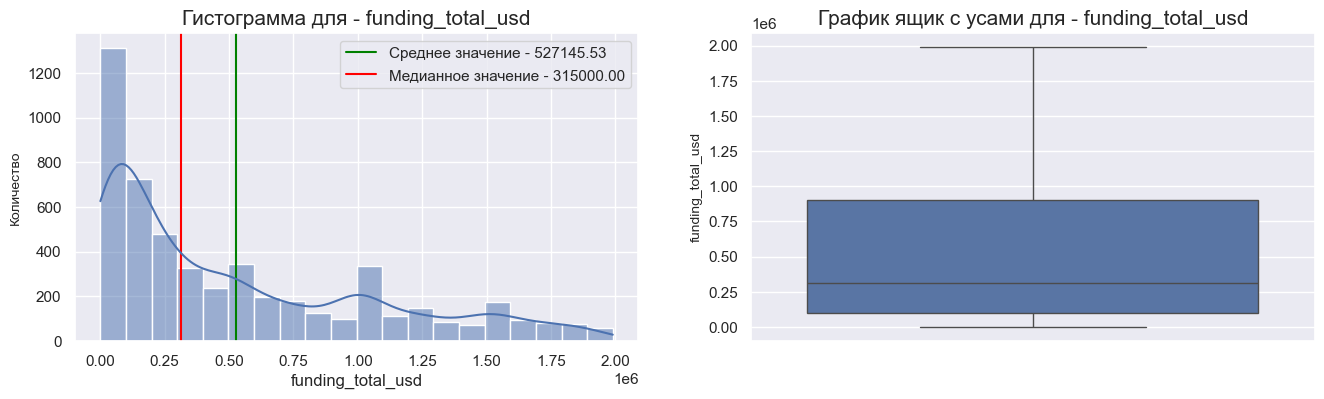

In [54]:
startups_test_analis = startups_test[startups_test['funding_total_usd'] < 2000000]
startups_test_analis = startups_test_analis[startups_test_analis['funding_total_usd'] > 0]
data_analysis(startups_test_analis, 'funding_total_usd')

Как и в прошлой таблице больше всего общая сумма финансирования меньше 25т. долларов.

In [55]:
print(startups_test['country_code'].value_counts().to_frame().head())
print(line)
print(startups_test['country_code'].value_counts(normalize=True).to_frame().head())

              count
country_code       
usa            7428
gbr             725
can             369
ind             307
chn             301
------------------------------------------------------------------------------------------------------------------------
              proportion
country_code            
usa             0.632547
gbr             0.061739
can             0.031423
ind             0.026143
chn             0.025632


Как и в прошлый раз США находится в топе и занмиает 64% таблицы.

In [56]:
print(startups_test['region'].value_counts().to_frame().head())
print(line)
print(startups_test['region'].value_counts(normalize=True).to_frame().head())

               count
region              
sf bay area     1750
new york city    712
london           481
boston           460
los angeles      343
------------------------------------------------------------------------------------------------------------------------
               proportion
region                   
sf bay area      0.151699
new york city    0.061720
london           0.041696
boston           0.039875
los angeles      0.029733


Тот-же регион что и в прошлый раз.

In [57]:
print(startups_test['city'].value_counts().to_frame().head())
print(line)
print(startups_test['city'].value_counts(normalize=True).to_frame().head())

               count
city                
san francisco    656
new york         641
london           384
austin           159
palo alto        155
------------------------------------------------------------------------------------------------------------------------
               proportion
city                     
san francisco    0.056856
new york         0.055556
london           0.033281
austin           0.013781
palo alto        0.013434


<b>san francisco</b> так-же снова на первом месте.

array([ 1,  2,  4,  5,  3,  6,  7, 10, 12,  8,  9, 11, 13, 15, 14],
      dtype=int64)

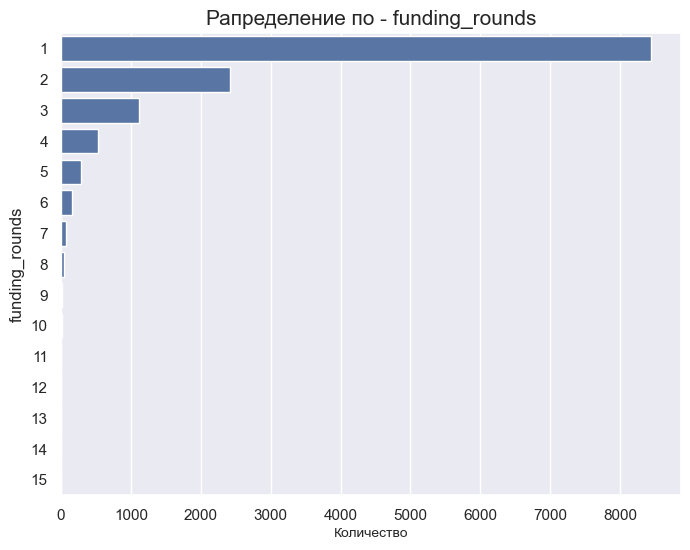

In [58]:
direct_diagram(startups_test, 'funding_rounds')

Снова количество инвестиционных раундов которое равняется 1 больше чем количество других инвестиционных раундов.

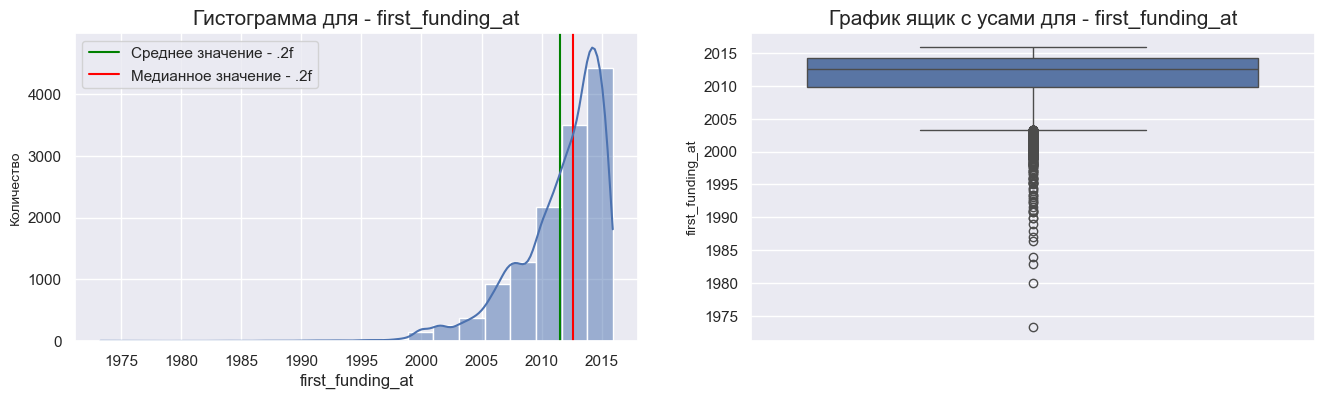

In [59]:
data_analysis(startups_test, 'first_funding_at')

В 2010 году прошло больше всего фин. раундов.

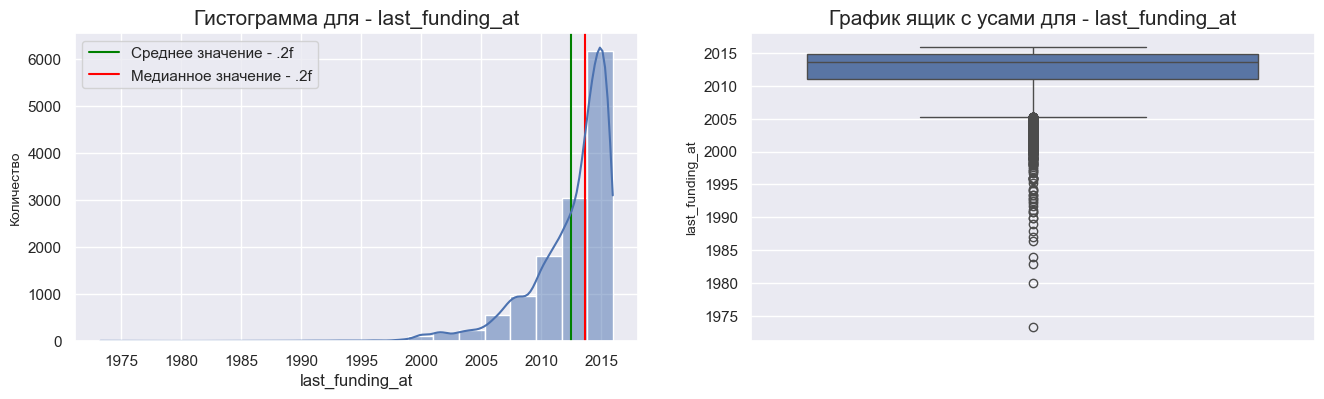

In [60]:
data_analysis(startups_test, 'last_funding_at')

Последние раунды тоже проходили восновном в 2010 году.

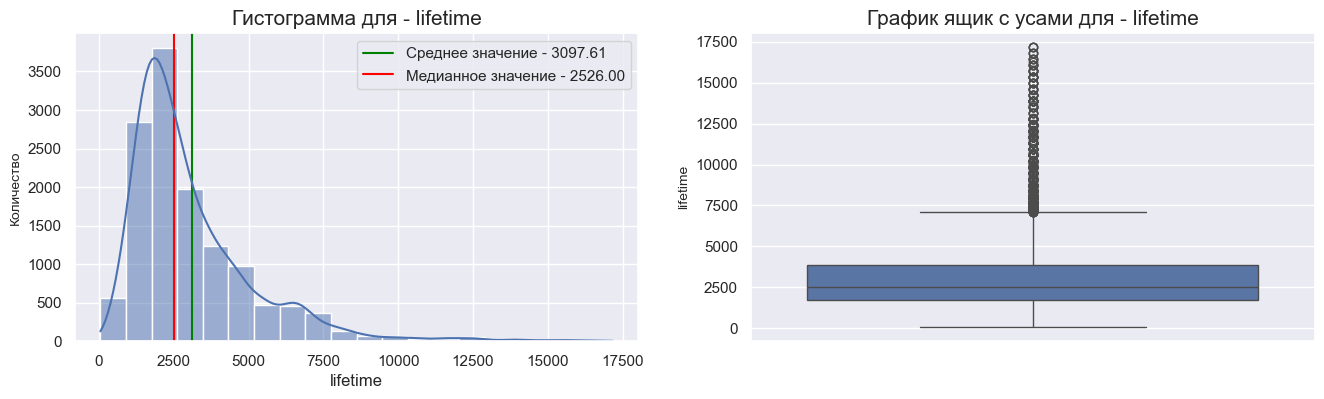

In [61]:
data_analysis(startups_test, 'lifetime')

В среднем компания на момент записи прожила 2500 дней.

Первое и последнее финансирвоание а так-же количество дней практически копируют предыдущую таблицу.

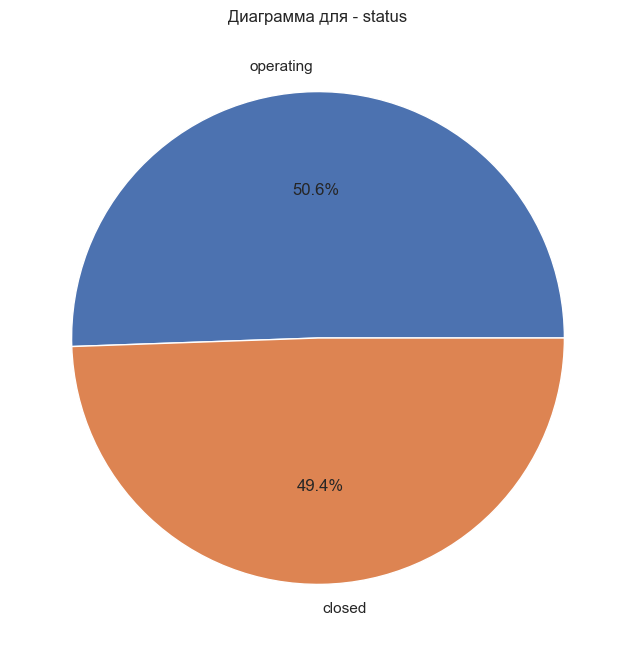

In [62]:
radial_diagram(startups_sample_submit, 'status')

А вот данные по тому закрылся ли стартап в этой таблице расспределены поровну.

### Вывод по исследовательскому анализу данных

<br>Таблицы <b>startups_train</b> и <b>startups_test</b> очень похожи между собой.
<br>В таблице предоставленно всего 9% закрытых стартапов. Поэтому описание начну с описания закрытых стартапов.
<br><b>Закрытые стартапы</b>
<br>Общая сумма финансирования распределена практически равномерно. У многих стартапов было финансирование до 200 тысяч долларов. Но есть и другие частво встречаемые суммы - 500 тысяч и даже миллион долларов. В основном стартапы работали 1000 дней с одним раундом финансирования. пик открытия стартапов пришелся на момент с 2008 по 2013. Так как почти у всех стартапов был один раунд финансирования дата первого и последнего дня финансирования практичеки одинаковые, их пик приходится на 2012 - 2016. Так-же на с датами финансирования совпадает и дата закрытия стартапа. Выглядит всё так что стартапы открывались работали в среднем 4 года, получали финансирование и закрывались. В основном стартапы находились в США - 62% от всех.
<br><b>Работающие стартапы</b>
<br>Сумма финансирования выросла. 500 тысяч уже не выглядит большой да и сумма в 200 тысяч выглядит как минимум. Время жизни тоже увеличилось и теперь оно в среднем доходит до отметки в 2500 дней. Количество раундов так-же как и в прошлый раз редко привышает 1, но появились стартапы у которых есть 19 раундов. Как и в прошлйы раз первая и последняя дата финансирования похожи между собой. У Пик началася с 2010 по 2015 год. А вот дата открытия новых стартапов немного отличается ибо в 2015 идёт сильный спад по количеству новых стартапов. В основном стартапы находились в США - 62% от всех.

## Разработка новых синтетических признаков

Разработаю новые признаки.

In [63]:
def new_signs (dataframe):
    # Время между первым и последним раундом финансирования
    dataframe['day_between_financing'] = (dataframe['last_funding_at'] - dataframe['first_funding_at']).dt.days
    # Средняя сумма финансирования за раунд
    dataframe['average_amount'] = dataframe['funding_total_usd'] / dataframe['funding_rounds']
    # Количество категорий
    dataframe['num_categories'] = dataframe['category_list'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
    # Год из даты первого финансирования
    dataframe['year_first_financing'] = pd.DatetimeIndex(dataframe['first_funding_at']).year
    # Месяц из даты первого финансирования
    dataframe['month_first_financing'] = pd.DatetimeIndex(dataframe['first_funding_at']).month 
    #День первого финансирования
    dataframe['day_first_financing'] = pd.DatetimeIndex(dataframe['first_funding_at']).day
    # Год из даты последнего финансирования
    dataframe['year_last_financing'] = pd.DatetimeIndex(dataframe['last_funding_at']).year
    # Месяц из даты последнего финансирования
    dataframe['month_last_financing'] = pd.DatetimeIndex(dataframe['last_funding_at']).month 
    #День последнего финансирования
    dataframe['day_last_financing'] = pd.DatetimeIndex(dataframe['last_funding_at']).day

In [64]:
new_signs(startups_train)

new_signs(startups_test)

In [65]:
startups_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,lifetime,day_between_financing,average_amount,num_categories,year_first_financing,month_first_financing,day_first_financing,year_last_financing,month_last_financing,day_last_financing
0,lunchgate,online reservations|restaurants,828626.0,operating,che,25,zurich,zürich,2,2009-10-17,...,2998,1310,4.143130e+05,1,2011,5,1,2014,12,1
1,earlens,manufacturing|medical|medical devices,42935019.0,operating,usa,ca,sf bay area,redwood city,4,2005-01-01,...,4748,1393,1.073375e+07,1,2010,5,4,2014,2,25
2,reviva pharmaceuticals,biotechnology,35456381.0,operating,usa,ca,sf bay area,san jose,3,2006-01-01,...,4383,681,1.181879e+07,1,2012,8,20,2014,7,2
3,sancilio and company,health care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,...,5114,1051,7.416667e+06,1,2011,9,1,2014,7,18
4,wiretough cylinders,manufacturing,NaN,operating,usa,va,va - other,bristol,1,2010-05-12,...,2791,0,NaN,1,2012,2,1,2012,2,1


<b>Вывод</b>
<br>Были разраотаны 9 признаков:
<br><b>day_between_financing</b> - время между первым и последним раундом финансирования.
<br><b>average_amount</b> - cредняя сумма финансирования за раунд.
<br><b>num_categories</b> - количество категорий.
<br>Год, месяц и день последней и первой даты финансирования:
<br><b>year_first_financing</b> 
<br><b>month_first_financing</b> 
<br><b>day_first_financing</b> 
<br><b>year_last_financing</b> 
<br><b>month_last_financing</b> 
<br><b>day_last_financing</b> 

## Обработка пропусков

Вот теперь обработаю пропуски.

Создам два списка с категориальными и числовыми данными. А так-же удалю из таблицы <b>startups_train</b> столбцы которых нет в <b>startups_test</b>. А так-же в <b>startups_test</b> вставлю столбец <b>status</b> из <b>startups_sample_submit</b> что-бы таблицы были индентичны. А так-же удалю и <b>first_funding_at</b> и <b>last_funding_at</b>.

In [66]:
startups_train = startups_train.drop(labels = 'founded_at', axis = 1)
startups_train = startups_train.drop(labels = 'closed_at', axis = 1)

startups_train = startups_train.drop(labels = 'first_funding_at', axis = 1)
startups_test = startups_test.drop(labels = 'first_funding_at', axis = 1)

startups_train = startups_train.drop(labels = 'last_funding_at', axis = 1)
startups_test = startups_test.drop(labels = 'last_funding_at', axis = 1)

startups_test = pd.merge(startups_test, startups_sample_submit, on="name")

categorical_data = ['name', 'category_list', 'status', 'country_code',
                    'state_code', 'region', 'city']

numeric_data = ['funding_total_usd', 'funding_rounds', 'lifetime', 
                'day_between_financing', 'average_amount', 'num_categories']

Заполню пропущенные значения. На числовых данный поставлю медиану а на категорильных значение - 'Unknown'

In [67]:
numeric_imputer = SimpleImputer(strategy='median')
startups_train[numeric_data] = numeric_imputer.fit_transform(startups_train[numeric_data])
startups_test[numeric_data] = numeric_imputer.transform(startups_test[numeric_data])

categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
startups_train[categorical_data] = categorical_imputer.fit_transform(startups_train[categorical_data])
startups_test[categorical_data] = categorical_imputer.transform(startups_test[categorical_data])

<b>Вывод</b>
<br>Категориальные пропуски были обработаны значением - 'Unknown'
<br>Числовые пропуски были обработы медианным значением. 

## Проверка на мультиколлинеарность

Обработаю целвую переменную.

In [68]:
def list_columns(i):
    if i == 'operating':
        return 0
    if i == 'closed':
        return 1

startups_train['status'] = startups_train['status'].apply(list_columns)
startups_test['status'] = startups_test['status'].apply(list_columns)

Проверю мультиколлинеарность с помощью VIF

In [69]:
list_columns = startups_train.select_dtypes(include=[np.number])

vif_data = pd.DataFrame()
vif_data["feature"] = list_columns.columns

vif_data["VIF"] = [variance_inflation_factor(list_columns.values, i)
                                                for i in 
                   range(len(list_columns.columns))]


big_signs = vif_data[vif_data['VIF'] > 5.0]['feature'].tolist()

print('Список признаков и их VIF')
print(vif_data)
print(line)
print('Список признаков где VIF больше 5')
print(big_signs)


Список признаков и их VIF
                  feature           VIF
0       funding_total_usd  2.300872e+00
1                  status  1.099685e+00
2          funding_rounds  2.506930e+00
3                lifetime  1.160764e+00
4   day_between_financing  1.403920e+06
5          average_amount  2.253892e+00
6          num_categories  1.035629e+00
7    year_first_financing  5.157061e+06
8   month_first_financing  3.422480e+04
9     day_first_financing  2.888677e+02
10    year_last_financing  4.396862e+06
11   month_last_financing  3.284505e+04
12     day_last_financing  2.825508e+02
------------------------------------------------------------------------------------------------------------------------
Список признаков где VIF больше 5
['day_between_financing', 'year_first_financing', 'month_first_financing', 'day_first_financing', 'year_last_financing', 'month_last_financing', 'day_last_financing']


Удалю признакы VIF которых больше 5.

In [70]:
startups_train = startups_train.drop(columns=big_signs)
startups_test = startups_test.drop(columns=big_signs)

<b>Вывод</b>
<br>Были выявленые и удалены признаки мультиколлинеарность которых была больше 5.

## Отбор финального набора обучающих признаков

In [71]:
X = startups_train.drop(['name','status'], axis=1)
y = startups_train['status']

categorical_data  = ['country_code','state_code','region','city']
numeric_data  = ['funding_total_usd', 'funding_rounds', 'lifetime', 'average_amount', 'num_categories']

numeric_present = [feature for feature in numeric_data if feature in X.columns]
categorical_present = [feature for feature in categorical_data if feature in X.columns]


X_num = X[numeric_data]
X_cat = X[categorical_data]

top = 10 
for col in categorical_data:
    top_categories = X_cat[col].value_counts().nlargest(top).index
    X_cat[col] = X_cat[col].apply(lambda x: x if x in top_categories else 'Other')

X_cat_encoded = pd.get_dummies(X_cat, drop_first=True, dummy_na=False)

X_processed = pd.concat([X_num, X_cat_encoded], axis=1)

selector = SelectKBest(score_func=mutual_info_classif, k=20)
X_selected = selector.fit_transform(X_processed, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = X_processed.columns[selected_indices]

print("Отобранные признаки:")
print(selected_feature_names.tolist())

startups_train_new = pd.DataFrame(X_selected, columns=selected_feature_names)
startups_train_new['status'] = y.values

Отобранные признаки:
['funding_total_usd', 'funding_rounds', 'lifetime', 'average_amount', 'num_categories', 'country_code_Unknown', 'country_code_chn', 'country_code_deu', 'country_code_fra', 'country_code_ind', 'country_code_usa', 'state_code_Other', 'state_code_Unknown', 'state_code_ca', 'state_code_ny', 'state_code_wa', 'region_Unknown', 'region_boston', 'region_sf bay area', 'city_Unknown']


## Выбор и обучение моделей

Создам X и y

In [72]:
X = startups_train_new.drop('status', axis=1)
y = startups_train_new['status']

Создам пайплайны

In [73]:
numeric_pipeline = Pipeline(steps=
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)
numeric_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [74]:
categorical_pipeline = Pipeline(steps=
    [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
categorical_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [75]:
preprocessor = ColumnTransformer(transformers=
    [
        ('num', numeric_pipeline, numeric_data),
        ('cat', categorical_pipeline, categorical_data)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['funding_total_usd', 'funding_rounds',
                                  'lifetime', 'average_amount',
                                  'num_categories']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['country_code', 'state_code', 'region',
                                  'city'])])

In [76]:
final_pipeline = Pipeline(steps=
    [
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]
)
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['funding_total_usd',
                                                   'funding_rounds', 'lifetime',
                                                   'average_amount',
                                                   'num_categories']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country_code', 'state_code',
                                                   'region', 'city'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Список моделей

In [77]:
param_grid = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 6],
            'max_features': [3,6]
        }
    }
}

Собираю всё воедино. 

In [78]:
randomized_search = RandomizedSearchCV(
    final_pipeline, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1)
randomized_search

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['funding_total_usd',
                                                                                'funding_rounds',
                                                                                'lifetime',
                                                                                'average_amount',
                                                                                'num_categories']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_freque...
                                                                        'max_depth': [3,
                                                                                      5],
                                                                        'n_estimators': [100,
                                                                                         200]}},
                                        'LogisticRegression': {'model': LogisticRegression(max_iter=1000,
                                                                                           random_state=42),
                                                               'params': {'C': [0.1,
                                                                                1,
                                                                                10],
                                                                          'penalty': ['l2']}},
                                        'RandomForest': {'model': RandomForestClassifier(random_state=42),
                                                         'params': {'max_depth': [10,
                                                                                  20,
                                                                                  None],
                                                                    'min_samples_split': [2,
                                                                                          5],
                                                                    'n_estimators': [100,
                                                                                     200]}}},
                   random_state=42, scoring='roc_auc')

Выведу список моделей и их показатели.

In [79]:
best_models = {}
best_scores = {}

for name, config in param_grid.items():
    print(f"Модель: {name}")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X, y)
    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    print(f"Оценка ROC-AUC: {grid_search.best_score_:.2f}")
    print(f"Параметры: {grid_search.best_params_}\n")

Модель: RandomForest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Оценка ROC-AUC: 0.91
Параметры: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

Модель: GradientBoosting
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Оценка ROC-AUC: 0.93
Параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Модель: LogisticRegression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Оценка ROC-AUC: 0.88
Параметры: {'C': 0.1, 'penalty': 'l2'}

Модель: DecisionTree
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Оценка ROC-AUC: 0.78
Параметры: {'max_depth': 6, 'max_features': 6}



<b>Вывод</b>
<br>Лучшая модель - GradientBoostingClassifier
<br>ROC-AUC модели - 0.93
<br>Параметры модели - 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200

## Итоговая оценка качества предсказания лучшей модели

Сохраню лучшую модель и её параметры в одну перменную.

In [80]:
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]
print(f"Модель: {best_model_name} с ROC-AUC = {best_scores[best_model_name]:.2f}")

Модель: GradientBoosting с ROC-AUC = 0.93


Обработаю тренировочные категориальные данные.

In [89]:
X = startups_train.drop(['name','status'], axis=1)
y = startups_train['status']

categorical_data  = ['country_code','state_code','region','city']
numeric_data  = ['funding_total_usd', 'funding_rounds', 'lifetime', 'average_amount', 'num_categories']

numeric_present = [feature for feature in numeric_data if feature in X.columns]
categorical_present = [feature for feature in categorical_data if feature in X.columns]


X_num = X[numeric_data]
X_cat = X[categorical_data]

top = 10 
for col in categorical_data:
    top_categories = X_cat[col].value_counts().nlargest(top).index
    X_cat[col] = X_cat[col].apply(lambda x: x if x in top_categories else 'Other')

X_cat_encoded = pd.get_dummies(X_cat, drop_first=True, dummy_na=False)

X_processed = pd.concat([X_num, X_cat_encoded], axis=1)

selector = SelectKBest(score_func=mutual_info_classif, k=20)
X_selected = selector.fit_transform(X_processed, y)

In [97]:
y_pred_proba = best_model.predict_proba(X_selected)[:, 1]
y_pred = best_model.predict(X_selected)

In [114]:
print(f'Метрика ROC-AUC на тренровочной выборке: {roc_auc_score(y, y_pred_proba):2f}')

Метрика ROC-AUC на тренровочной выборке: 0.936630


In [91]:
print("Отчет на обучающем наборе:")
print(classification_report(y, y_pred))

Отчет на обучающем наборе:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     47599
           1       0.87      0.53      0.66      4917

    accuracy                           0.95     52516
   macro avg       0.91      0.76      0.82     52516
weighted avg       0.95      0.95      0.94     52516



Обработаю тестовые категориальные данные.

In [93]:
X_test = startups_test.drop(['name','status'], axis=1)
y_test = startups_test['status']

categorical_data  = ['country_code','state_code','region','city']
numeric_data  = ['funding_total_usd', 'funding_rounds', 'lifetime', 'average_amount', 'num_categories']

numeric_present = [feature for feature in numeric_data if feature in X_test.columns]
categorical_present = [feature for feature in categorical_data if feature in X_test.columns]


X_test_num = X_test[numeric_data]
X_test_cat = X_test[categorical_data]

top = 10 
for col in categorical_data:
    top_categories = X_test_cat[col].value_counts().nlargest(top).index
    X_test_cat[col] = X_test_cat[col].apply(lambda x: x if x in top_categories else 'Other')

X_test_cat_encoded = pd.get_dummies(X_test_cat, drop_first=True, dummy_na=False)

X_test_processed = pd.concat([X_test_num, X_test_cat_encoded], axis=1)

selector = SelectKBest(score_func=mutual_info_classif, k=20)
X_test_selected = selector.fit_transform(X_test_processed, y_test)


Применю модель на тестовых данных.

In [94]:
test_pred = best_model.predict(X_test_selected)
test_proba =  best_model.predict_proba(X_test_selected)

In [116]:
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, test_pred):2f}')

Метрика ROC-AUC на тестовой выборке: 0.500000


In [118]:
print("Отчет на тестовом наборе:")
print(classification_report(y_test, test_pred))

Отчет на тестовом наборе:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.49      1.00      0.66       167

    accuracy                           0.49       339
   macro avg       0.25      0.50      0.33       339
weighted avg       0.24      0.49      0.33       339



<b>Вывод</b>
<br>Показатели на тестовом наборе просто ужасны. Переобучение на лицо вроде-бы. НО, если вспомнить разведочный анализ то там можно заметить что закрытых стартапов в таблице <b>startups_train</b> всего 9%. Дальше можно посмотреть на анализ закрытых и работающих стартапов и увидеть то что данные практически не отличаются. Одинаковое количество раундов, количество дней которое просуществовал стартап, выделяемые суммы в фин. раундах  и. т.д. 
<br>Для более качественного предсказания нужно больше признаков или больше данных с закрытыми стартапами. 

## Анализ важности ее признаков

In [124]:
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [125]:
print("Топ-10 наиболее важных признаков:")
print(importance_df.head(10))

Топ-10 наиболее важных признаков:
               Feature  Importance
2             lifetime    0.873101
0    funding_total_usd    0.043437
3       average_amount    0.033420
4       num_categories    0.009634
1       funding_rounds    0.008959
19        city_Unknown    0.005694
9     country_code_ind    0.005285
16      region_Unknown    0.004045
18  region_sf bay area    0.002720
12  state_code_Unknown    0.002092


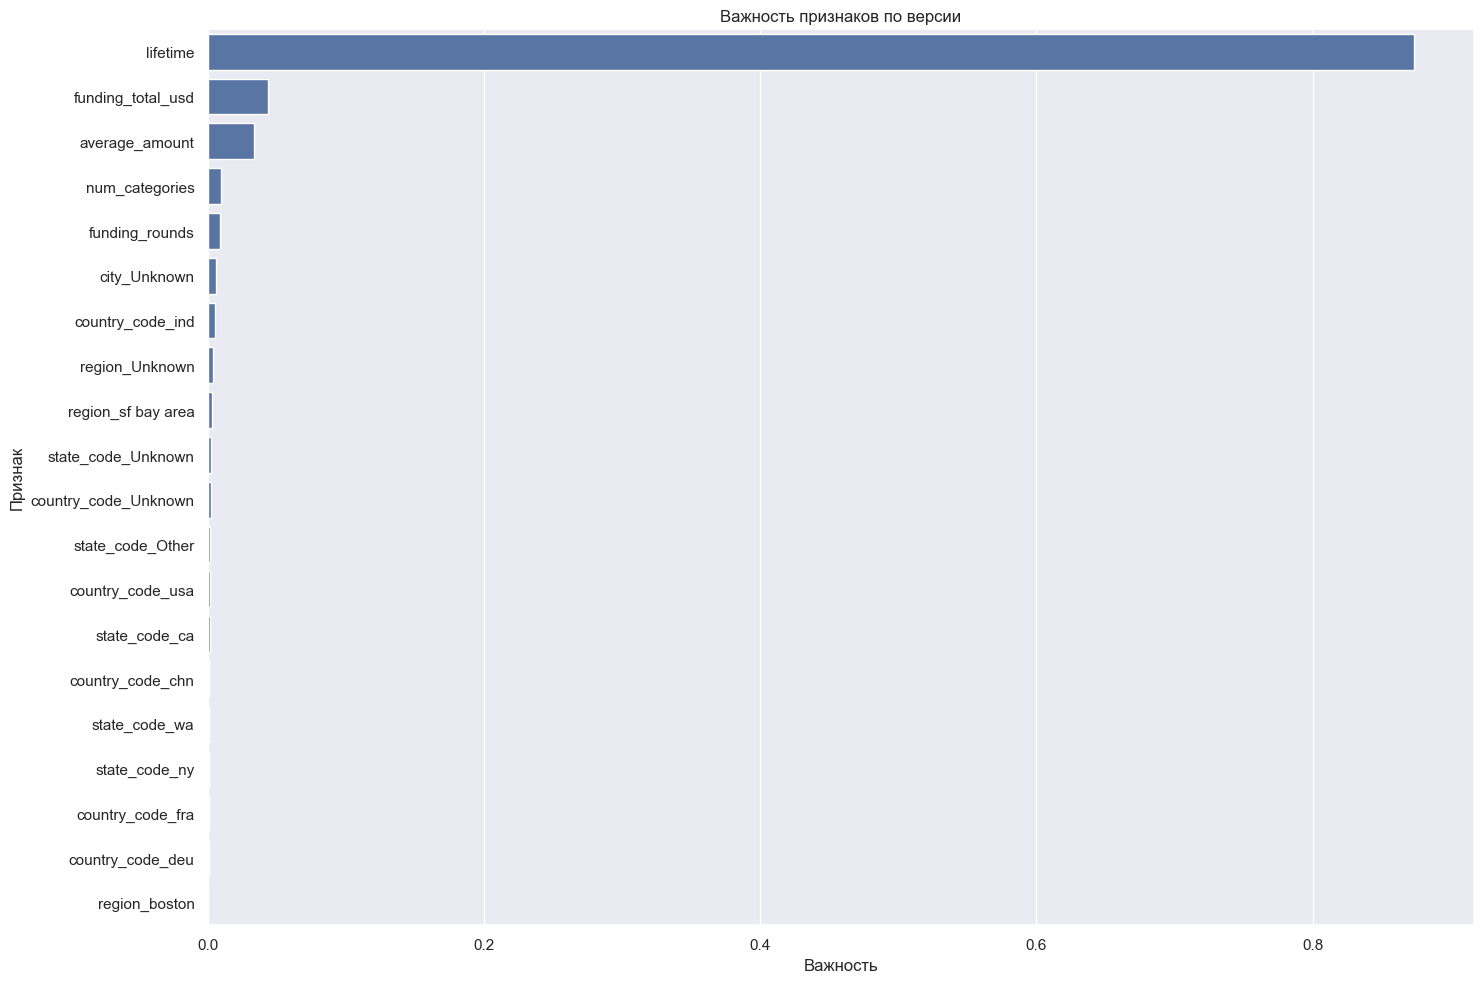

In [127]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Важность признаков по версии')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

<b>Вывод</b>
<br>Самый важный признак - <b>lifetime</b>. Это натсолько важный признак что все остальные в сравнении с ним выглядят буд-то их нет. Что подтверждает низкие показатели на тестовой таблице. Ибо как можно вспомнить это значение не сильно отличается в закрытых или работающих стартапах.

## Подготовка отчета по исследованию.

<b>Загрузка и ознакомление с данными</b>
<br>Создано 3 таблицы:
<br>1. 'startups_sample_submit' из 'kaggle_startups_sample_submit_28062024.csv' - имеет 13125 строк и 2 столбца. Пропусков нет.
<br>2. 'startups_train' из 'kaggle_startups_train_28062024.csv' - имеет 52516 строк и 13 столбцов. Есть пропуски.
<br>3. 'startups_test' из 'kaggle_startups_test_28062024.csv' - имеет 13125 строк и 11 столбцов. Есть пропуски.
<br>
<br>
<b>Предварительная обработка</b>
<br>Таблица <b>startups_sample_submit</b>:
<br>С ней всё в порядке. В переработке не нуждалась.
<br>
<br>Таблица <b>startups_train</b>:
<br>Символы преведены в нижний регистр.
<br>Дубликатов не обнаруженно.
<br>Создан столбец - <b>lifetime</b> - срок работы стартапа на момент записи датасета.
<br>
<br>Таблица <b>startups_test</b>:
<br>Символы преведены в нижний регистр.
<br>Дубликатов не обнаруженно.
<br>
<br><b>
Полноценный разведочный анали</b>з

<br>Таблицы <b>startups_train</b> и <b>startups_test</b> очень похожи между собой.
<br>В таблице предоставленно всего 9% закрытых стартапов. Поэтому описание начну с описания закрытых стартапов.
<br><b>Закрытые стартапы</b>
<br>Общая сумма финансирования распределена практически равномерно. У многих стартапов было финансирование до 200 тысяч долларов. Но есть и другие частво встречаемые суммы - 500 тысяч и даже миллион долларов. В основном стартапы работали 1000 дней с одним раундом финансирования. пик открытия стартапов пришелся на момент с 2008 по 2013. Так как почти у всех стартапов был один раунд финансирования дата первого и последнего дня финансирования практичеки одинаковые, их пик приходится на 2012 - 2016. Так-же на с датами финансирования совпадает и дата закрытия стартапа. Выглядит всё так что стартапы открывались работали в среднем 4 года, получали финансирование и закрывались. В основном стартапы находились в США - 62% от всех.
<br><b>Работающие стартапы</b>
<br>Сумма финансирования выросла. 500 тысяч уже не выглядит большой да и сумма в 200 тысяч выглядит как минимум. Время жизни тоже увеличилось и теперь оно в среднем доходит до отметки в 2500 дней. Количество раундов так-же как и в прошлый раз редко привышает 1, но появились стартапы у которых есть 19 раундов. Как и в прошлйы раз первая и последняя дата финансирования похожи между собой. У Пик началася с 2010 по 2015 год. А вот дата открытия новых стартапов немного отличается ибо в 2015 идёт сильный спад по количеству новых стартапов. В основном стартапы находились в США - 62% от все
<br>
<br>
<b>Разработка новых синтетических признаков</b>
<br>Были разраотаны 9 признаков:
<br><b>day_between_financing</b> - время между первым и последним раундом финансирования.
<br><b>average_amount</b> - cредняя сумма финансирования за раунд.
<br><b>num_categories</b> - количество категорий.
<br>Год, месяц и день последней и первой даты финансирования:
<br><b>year_first_financing</b> 
<br><b>month_first_financing</b> 
<br><b>day_first_financing</b> 
<br><b>year_last_financing</b> 
<br><b>month_last_financing</b> 
<br><b>day_last_financing</b> 
<br>Так-же были обработаны пропуски где категориальные пропуски были обработаны значением - 'Unknown'а чЧисловые пропуски были обработы медианным значением.<br>
<br>
<b>Проверка на мультиколлинеарность</b> 
<br>Были выявленые и удалены признаки мультиколлинеарность которых была больше 5. Это признаки - 'day_between_financing', 'year_first_financing', 'month_first_financing', 'day_first_financing', 'year_last_financing', 'month_last_financing', 'day_last_financing'
<br>
<br>
<b>Отбор финального набора обучающих признаков</b>
<br>Были отобраны обучающие признаки - 'funding_total_usd', 'funding_rounds', 'lifetime', 'average_amount', 'num_categories', 'country_code_Unknown', 'country_code_chn', 'country_code_deu', 'country_code_fra', 'country_code_ind', 'country_code_usa', 'state_code_Other', 'state_code_Unknown', 'state_code_ca', 'state_code_ny', 'state_code_wa', 'region_Unknown', 'region_boston', 'region_sf bay area', 'city_Unknown'
<br>
<br>
<b>Выбор и обучение моделей</b>
<br>Были созданы пайплайны а так-же выбраны 4 модели RandomForestClassifier, GradientBoostingClassifier, LogisticRegression и DecisionTreeClassifier. Так-же была определена лучшая модель с параметрами: 
<br>Лучшая модель - GradientBoostingClassifier
<br>ROC-AUC модели - 0.93
<br>Параметры модели - 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200
<br>
<br>
<b>Итоговая оценка качества предсказания лучшей модели</b>
<br>Были посчитаны оценки качества тренировочной и тестовой таблицах.
<br>Метрика ROC-AUC на тренровочной выборке: 0.936630
<br>Метрика ROC-AUC на тестовой выборке: 0.500000
<br>Показатели на тестовом наборе просто ужасны. Переобучение на лицо вроде-бы. НО, если вспомнить разведочный анализ то там можно заметить что закрытых стартапов в таблице <b>startups_train</b> всего 9%. Дальше можно посмотреть на анализ закрытых и работающих стартапов и увидеть то что данные практически не отличаются. Одинаковое количество раундов, количество дней которое просуществовал стартап, выделяемые суммы в фин. раундах  и. т.д. 
<br>Для более качественного предсказания нужно больше признаков или больше данных с закрытыми стартапами. 
<br>
<br>
<b>Анализ важности ее признаков</b>
<br>Самый важный признак - <b>lifetime</b>. Это натсолько важный признак что все остальные в сравнении с ним выглядят буд-то их нет. Что подтверждает низкие показатели на тестовой таблице. Ибо как можно вспомнить это значение не сильно отличается в закрытых или работающих стартапах.
<br>
<br>
<b>Рекомендации</b>
<br>Для более точного прогноза желательно добавть либо больше информации по стартапам либо больше закрытых стартапов в датасет. Время которое уже проработал стартап очень важно в отношении его закрытия. Так-же чем больше финансирования было у стартапа темь меньше шанс его закрытия. 
х.ки.